# Project 2: Finance

**DESCRIPTION**

Problem Statement

Finance Industry is the biggest consumer of Data Scientists. It faces constant attack by fraudsters, who try to trick the system. Correctly identifying fraudulent transactions is often compared with finding needle in a haystack because of the low event rate. 
It is important that credit card companies are able to recognize fraudulent credit card transactions so that the customers are not charged for items that they did not purchase.
You are required to try various techniques such as supervised models with oversampling, unsupervised anomaly detection, and heuristics to get good accuracy at fraud detection.
Dataset Snapshot

The datasets contain transactions made by credit cards in September 2013 by European cardholders. This dataset represents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Downlod the **data sets** from _**[here](https://www.dropbox.com/s/6z5jxcqaqipxiun/Project%202-Finance-Datasets.zip?dl=0)**_.

---

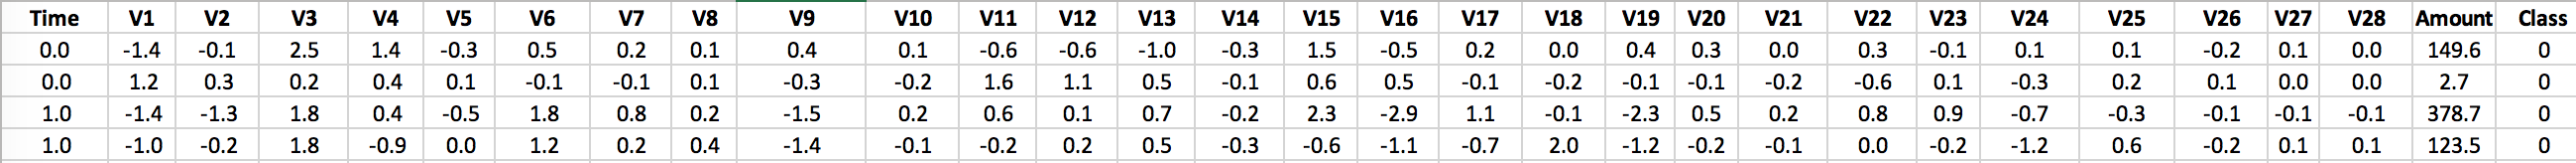

In [1]:
from IPython.display import Image
Image("finance_capstone.png")

It contains only numerical input variables which are the result of a PCA transformation. 
Features V1, V2, ... V28 are the principal components obtained with PCA. 
The only features which have not been transformed with PCA are 'Time' and 'Amount'

 

#### Project Task: Week 1

**Exploratory Data Analysis (EDA):**

1.    Perform an EDA on the Dataset.
       a)    Check all the latent features and parameters with their mean and standard deviation. Value are close to 0 centered        (mean) with unit standard deviation
       b)    Find if there is any connection between Time, Amount, and the transaction being fraudulent.
2.    Check the class count for each class. It’s a class Imbalance problem.
3.    Use techniques like undersampling or oversampling before running Naïve Bayes, Logistic Regression or SVM.
       a.    Oversampling or undersampling can be used to tackle the class imbalance problem
       b.    Oversampling increases the prior probability of imbalanced class and in case of other classifiers, error gets                  multiplied as the low-proportionate class is mimicked multiple times.
4     Following are the matrices for evaluating the model performance: Precision, Recall, F1-Score, AUC-ROC curve. Use F1-Score       as the evaluation criteria for this project.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
test_df=pd.read_csv("f_test_data.csv")
train_df=pd.read_csv("f_train_data.csv")
validation_df=pd.read_csv("f_test_data_hidden.csv")
merge_df=pd.concat([train_df,validation_df],ignore_index=True)
print("Shape of merged data", merge_df.shape)

Shape of merged data (284807, 31)


In [4]:
merge_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,38355.0,1.043949,0.318555,1.045810,2.805989,-0.561113,-0.367956,0.032736,-0.042333,-0.322674,...,-0.240105,-0.680315,0.085328,0.684812,0.318620,-0.204963,0.001662,0.037894,49.67,0
1,22555.0,-1.665159,0.808440,1.805627,1.903416,-0.821627,0.934790,-0.824802,0.975890,1.747469,...,-0.335332,-0.510994,0.035839,0.147565,-0.529358,-0.566950,-0.595998,-0.220086,16.94,0
2,2431.0,-0.324096,0.601836,0.865329,-2.138000,0.294663,-1.251553,1.072114,-0.334896,1.071268,...,0.012220,0.352856,-0.341505,-0.145791,0.094194,-0.804026,0.229428,-0.021623,1.00,0
3,86773.0,-0.258270,1.217501,-0.585348,-0.875347,1.222481,-0.311027,1.073860,-0.161408,0.200665,...,-0.424626,-0.781158,0.019316,0.178614,-0.315616,0.096665,0.269740,-0.020635,10.78,0
4,127202.0,2.142162,-0.494988,-1.936511,-0.818288,-0.025213,-1.027245,-0.151627,-0.305750,-0.869482,...,0.010115,0.021722,0.079463,-0.480899,0.023846,-0.279076,-0.030121,-0.043888,39.96,0


In [5]:
merge_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.254334e-15,3.284651e-16,-1.400675e-15,2.053948e-15,1.020816e-15,1.497614e-15,-5.772893e-16,1.195394e-16,-2.420241e-15,...,1.621946e-16,-3.311190e-16,2.560685e-16,4.487627e-15,5.293593e-16,1.678857e-15,-3.501295e-16,-1.357152e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

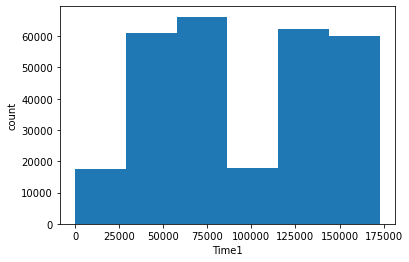

In [7]:
fig,ax=plt.subplots(1,1)
ax.hist((merge_df['Time']),bins=6)
ax.set_xlabel('Time1')
ax.set_ylabel('count')
plt.show()

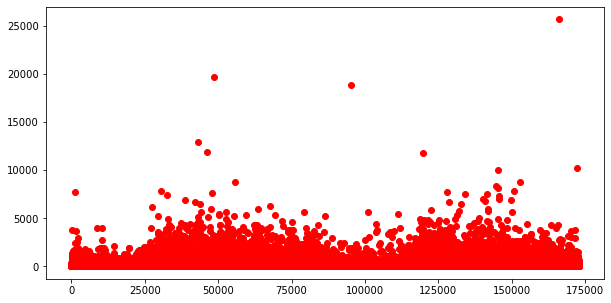

In [8]:
x=merge_df['Time']
y=merge_df['Amount']
fig=plt.figure(figsize=(10,5))
plt.scatter(x,y,color='r')
plt.show()

In [9]:
merge_df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

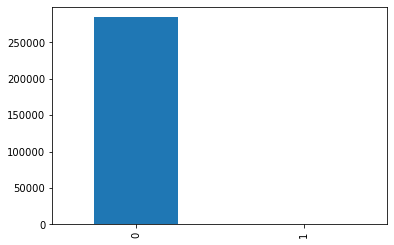

In [10]:
merge_df["Class"].value_counts().plot.bar()

#### from above graph we understand that the class is imbalanced. The score of non fraud is too high i.e. 284315 whereas that of fraud is 492. Hence we need to control this imbalancing by sampling techniques.

#### Solving class imbalance problem by using random undersampling and oversampling on train, merged & validation dataset

In [11]:
#1.Train Dataset
count_class_0, count_class_1 = train_df.Class.value_counts()
df_class_0 = train_df[train_df['Class'] == 0]
df_class_1 = train_df[train_df['Class'] == 1]
#2. Merged Dataset
count_class_m_0, count_class_m_1 = merge_df.Class.value_counts()
df_class_m_0 = merge_df[merge_df['Class'] == 0]
df_class_m_1 = merge_df[merge_df['Class'] == 1]
#3. Validation Dataset
count_class_v_0, count_class_v_1 = validation_df.Class.value_counts()
df_class_v_0 = validation_df[validation_df['Class'] == 0]
df_class_v_1 = validation_df[validation_df['Class'] == 1]

#### 1. Random Undersampling

Random under-sampling:
1    394
0    394
Name: Class, dtype: int64


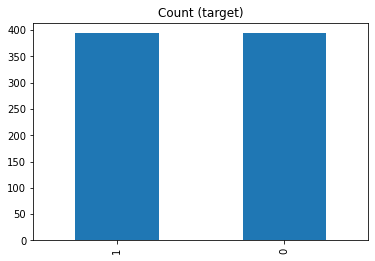

In [12]:
# 1.a. Train DataSet

df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.Class.value_counts())

df_under.Class.value_counts().plot(kind='bar', title='Count (target)');

Random under-sampling:
1    492
0    492
Name: Class, dtype: int64


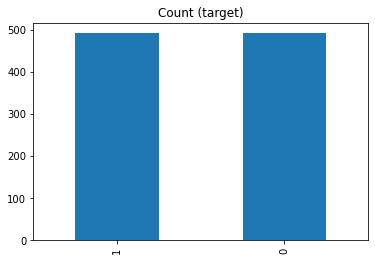

In [13]:
# 1.b. Merge Dataset
df_class_m_0_under = df_class_m_0.sample(count_class_m_1)
df_under_m = pd.concat([df_class_m_0_under, df_class_m_1], axis=0)

print('Random under-sampling:')
print(df_under_m.Class.value_counts())

df_under_m.Class.value_counts().plot(kind='bar', title='Count (target)');

Random under-sampling:
1    98
0    98
Name: Class, dtype: int64


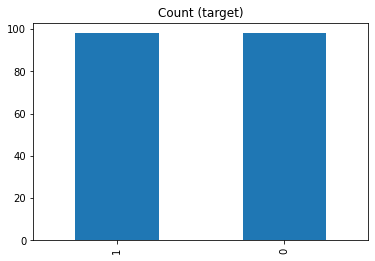

In [14]:
# 1.c. Validation Dataset
df_class_v_0_under = df_class_v_0.sample(count_class_v_1)
df_under_v = pd.concat([df_class_v_0_under, df_class_v_1], axis=0)

print('Random under-sampling:')
print(df_under_v.Class.value_counts())

df_under_v.Class.value_counts().plot(kind='bar', title='Count (target)');

### 2. Random Oversampling

Random over-sampling:
1    227451
0    227451
Name: Class, dtype: int64


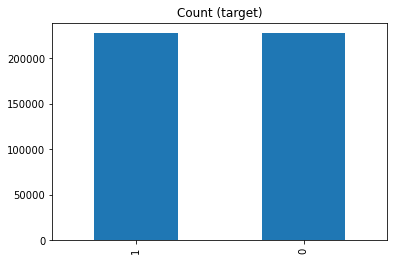

In [15]:
# 2.a Train dataset
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_1_over, df_class_0], axis=0)

print('Random over-sampling:')
print(df_over.Class.value_counts())

df_over.Class.value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
1    284315
0    284315
Name: Class, dtype: int64


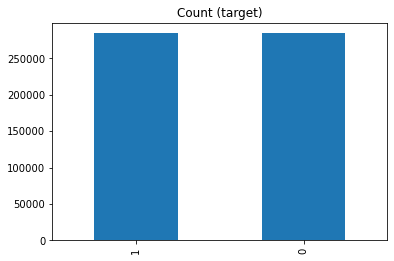

In [16]:
# 2.b. Merge Dataset
df_class_1_m_over = df_class_m_1.sample(count_class_m_0, replace=True)
df_over_m = pd.concat([df_class_1_m_over, df_class_m_0], axis=0)

print('Random over-sampling:')
print(df_over_m.Class.value_counts())

df_over_m.Class.value_counts().plot(kind='bar', title='Count (target)');

Random over-sampling:
1    56864
0    56864
Name: Class, dtype: int64


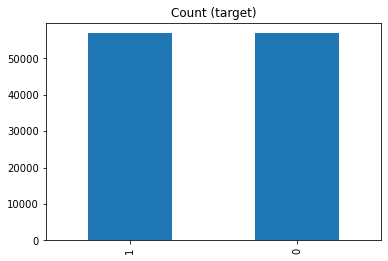

In [17]:
# 2.c. Validation dataset
df_class_1_v_over = df_class_v_1.sample(count_class_v_0, replace=True)
df_over_v = pd.concat([df_class_1_v_over, df_class_v_0], axis=0)

print('Random over-sampling:')
print(df_over_v.Class.value_counts())

df_over_v.Class.value_counts().plot(kind='bar', title='Count (target)');

In [18]:
X_un=df_under.loc[:,df_under.columns!='Class']
y_un=df_under.loc[:,df_under.columns == 'Class']
X_train,X_test,y_train,y_test=train_test_split(X_un,y_un,test_size=0.2)

#### Predicting model accuracy on train dataset :
#### Using i) Naive Bayes and ii) Logistic Regression
### i) Naive Bayes Classifier for undersampled Data

In [19]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb_fit=gnb.fit(X_train, y_train.values.ravel()) 

In [20]:
y_pred = gnb_fit.predict(test_df)

In [21]:
gnb_fit

GaussianNB()

In [22]:
Y_test=validation_df['Class']

In [23]:
from sklearn import metrics
print("Accuracy of train data:",metrics.accuracy_score(y_train,gnb_fit.predict(X_train)))
print("Accuracy of test data:",metrics.accuracy_score(Y_test,y_pred))
print("Gaussian Naive Bayes model confusion matrix in under sampled data:","\n", metrics.confusion_matrix(Y_test, y_pred))
print(" classification report :","\n",metrics.classification_report(Y_test, y_pred))

Accuracy of train data: 0.8444444444444444
Accuracy of test data: 0.9904322179698747
Gaussian Naive Bayes model confusion matrix in under sampled data: 
 [[56347   517]
 [   28    70]]
 classification report : 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.12      0.71      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.85      0.60     56962
weighted avg       1.00      0.99      0.99     56962



### Naive Bayes Classifier for oversampled Data

In [24]:
X_uv=df_over.loc[:,df_over.columns!='Class']
y_uv=df_over.loc[:,df_over.columns == 'Class']
X_train1,X_test1,y_train1,y_test1=train_test_split(X_uv,y_uv,train_size=0.8)

In [25]:
gnb = GaussianNB() 
gnb.fit(X_train1, y_train1.values.ravel()) 

GaussianNB()

In [26]:
y_pred1 = gnb.predict(test_df)
print("Accuracy/score of train data:",metrics.accuracy_score(y_train1,gnb_fit.predict(X_train1)))
print("Accuracy/score of test data:",metrics.accuracy_score(Y_test,y_pred))
print("Gaussian Naive Bayes model Confusion Matrix in over sampled data:","\n", metrics.confusion_matrix(Y_test, y_pred1))
print("Classification Report:","\n", metrics.classification_report(Y_test, y_pred1))

Accuracy/score of train data: 0.8549245578023802
Accuracy/score of test data: 0.9904322179698747
Gaussian Naive Bayes model Confusion Matrix in over sampled data: 
 [[56334   530]
 [   28    70]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.12      0.71      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.85      0.60     56962
weighted avg       1.00      0.99      0.99     56962



### ii) Logistic Regression on undersampled data

In [27]:
from sklearn.linear_model import LogisticRegression
lr_under = LogisticRegression(max_iter=100000)
lr_under.fit(X_train,y_train.values.ravel())
y_pred_un_lr= lr_under.predict(test_df)

In [28]:
lr_uv = LogisticRegression()
lr_uv.fit(X_train1,y_train1.values.ravel())
y_pred_uv_lr = lr_uv.predict(test_df)

In [29]:
print("Accuracy score on undersampled train data LR:",metrics.accuracy_score(y_train,lr_under.predict(X_train)))
print("Accuracy score on undersampled test data LR:",metrics.accuracy_score(Y_test,y_pred_un_lr))
print("Confusion matrix on undersampled data LR:","\n",metrics.confusion_matrix(Y_test,y_pred_un_lr))
print("Classification report on undersampled data LR:","\n",metrics.classification_report(Y_test,y_pred_un_lr))

Accuracy score on undersampled train data LR: 0.9333333333333333
Accuracy score on undersampled test data LR: 0.9626768723008321
Confusion matrix on undersampled data LR: 
 [[54751  2113]
 [   13    85]]
Classification report on undersampled data LR: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.87      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962



### Logistic Regression on oversampled data

In [30]:
print("Accuracy score on oversampled train data LR:",metrics.accuracy_score(y_train1,lr_uv.predict(X_train1)))
print("Accuracy score on oversampled test data LR:",metrics.accuracy_score(Y_test,y_pred_uv_lr))
print("Confusion matrix on oversampled data LR:","\n",metrics.confusion_matrix(Y_test,y_pred_uv_lr))
print("Classification report on oversampled data LR:","\n",metrics.classification_report(Y_test,y_pred_uv_lr))

Accuracy score on oversampled train data LR: 0.9223567752341855
Accuracy score on oversampled test data LR: 0.9572873143499175
Confusion matrix on oversampled data LR: 
 [[54447  2417]
 [   16    82]]
Classification report on oversampled data LR: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.84      0.06        98

    accuracy                           0.96     56962
   macro avg       0.52      0.90      0.52     56962
weighted avg       1.00      0.96      0.98     56962




### Note: Major terms used with AUC and ROC Curve

Let us consider :
* **TP** - True Positive
* **FP** - False Negative
* **TN** - True Negative
* **FP** - False Negative 

Now, the classification report will calculate the below values for evaluating each model :

**1. Precision :**
$$ Precision = \frac{TP}{TP \; + \; FP} = \frac{TP}{Total \; Predicted \; Possitive} \\ $$
<br/>
**2. Sensitivity or Recall or TPR (True Positive Rate) :**
$$ TPR \; / \; Recall \; / \; Sensitivity = \frac{TP}{TP \; + \; FN} = \frac{TP}{Total \; Total \; Actual \; Positive} \\ $$
<br/>
**3. Specificity :**
$$ Specificity = \frac{TN}{TN \; + \; FP} \\ $$
<br/>
**4. FPR (False Positive Rate) or TNR (True Negative Rate) :**
$$ TPR \; or \; FPR = 1 \; - \; Specificity = 1 - \left( \frac{TN}{TN \; + \; FP} \right ) = \frac{FP}{TN \; + \; FP} \\ $$
<br/>
**5. F1-Score :**
$$ F1 = 1 \; * \;  \left( \frac{Precision \; * \; Recall}{Precision \; + \; Recall} \right ) \\ $$

<br/>

##### Plotting ROC_AUC curve and accuracy score on undersampled and oversampled data


In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def draw_roc(actual,probs):
    fpr,tpr,thresholds=roc_curve(actual,probs,drop_intermediate=False)
    auc_score=roc_auc_score(actual,probs)
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr,label='ROC curve (area=%0.2f)' %auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive rate or [1-True Negative rate]--undersampled data')
    plt.ylabel('True positive rate')
    plt.legend(loc="lower right")
    plt.show()
    
    return fpr,tpr,thresholds


AUC_score for undersampled data:  0.9150940518300735
AUC_score for overrsampled data:  0.8971148849241443


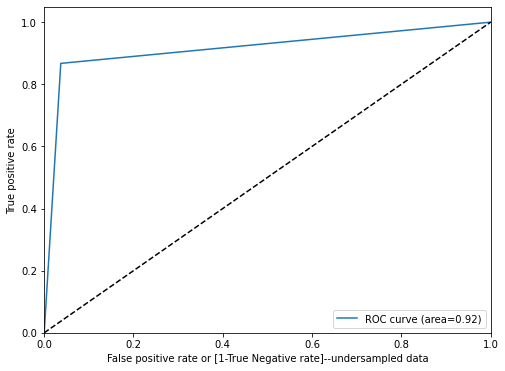

In [32]:
print("AUC_score for undersampled data: ",roc_auc_score(Y_test,y_pred_un_lr))
print("AUC_score for overrsampled data: ",roc_auc_score(Y_test,y_pred_uv_lr))
fpr,tpr,thresholds=draw_roc(Y_test,y_pred_un_lr)

We will use undersampled data for further modelling techniques. 
test,train data sets: X_train,y_train,X_test,y_test,Y_test

## Project Task: Week 2

#### Modeling Techniques:

Try out models like Naive Bayes, Logistic Regression or SVM. Find out which one performs the best
Use different Tree-based classifiers like Random Forest and XGBoost.

       a.    Remember Tree-based classifiers work on two ideologies: Bagging or Boosting
       b.    Tree-based classifiers have fine-tuning parameters which takes care of the imbalanced class. Random-Forest and                  XGBboost.
       
Compare the results of 1 with 2 and check if there is any incremental gain.

# Using different Tree-based classifiers like Random Forest and XGBoost.


In [33]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier

In [34]:
base_cls= RandomForestClassifier()
num_trees=500
random_state=10

### For tree based classifier we generally focus on bagging and boosting ideologies. 
#### 1.For bagging we will use:
    a) RandomForestClassifier
#### 2.For boosting we will use:
    a) Adaboost
    b) XGBoost
And check their accuracy


#### 1.a. RandomForestClassifier from sklearn.ensemble

In [35]:
rfm = RandomForestClassifier(max_depth=2,random_state=0)
rfm.fit(X_train, y_train.values.ravel())
rfm_pred= rfm.predict(test_df)

In [36]:
print("Accuracy score on Bagging train data:",metrics.accuracy_score(y_train,rfm.predict(X_train)))
print("Accuracy score on Bagging test data:",metrics.accuracy_score(Y_test,rfm_pred))
print("Confusion Matrix:","\n",metrics.confusion_matrix(Y_test,rfm_pred))
print("Classification Report:","\n",metrics.classification_report(Y_test,rfm_pred))

Accuracy score on Bagging train data: 0.9222222222222223
Accuracy score on Bagging test data: 0.994417330852147
Confusion Matrix: 
 [[56562   302]
 [   16    82]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.84      0.34        98

    accuracy                           0.99     56962
   macro avg       0.61      0.92      0.67     56962
weighted avg       1.00      0.99      1.00     56962



#### 2.a. AdaBoostClassifier from sklearn.ensemble

In [37]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train.values.ravel())
ada_pred=ada.predict(test_df)

In [38]:
print("Accuracy score on Boosting over train data:",metrics.accuracy_score(y_train,ada.predict(X_train)))
print("Accuracy score on Boosting over test data:",metrics.accuracy_score(Y_test,ada_pred))
print("Confusion Matrix:","\n",metrics.confusion_matrix(Y_test,ada_pred))
print("Classification Report:","\n",metrics.classification_report(Y_test,ada_pred))

Accuracy score on Boosting over train data: 1.0
Accuracy score on Boosting over test data: 0.949492644218953
Confusion Matrix: 
 [[54001  2863]
 [   14    84]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.86      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



#### 2.b. XGBoost Classifier

In [39]:
import xgboost
import pandas.util.testing as tm
xgb_model = xgboost.XGBClassifier(objective='binary:logistic',
                 colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model.fit(X_train,y_train.values.ravel())

C:\Users\pc\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.07, max_delta_step=0, max_depth=3,
              min_child_weight=1.5, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=0, num_parallel_tree=1,
              random_state=42, reg_alpha=0.75, reg_lambda=0.45,
              scale_pos_weight=1, seed=42, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [40]:
xgb_pred=xgb_model.predict(test_df)
print("Classification Report:","\n",metrics.classification_report(Y_test,xgb_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.88      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962



#### Comparing the results of undersmpled data from all 04 modelling techniques namely Logistic Regression, Naive Bayes, Random Forest & XGBoost in a sequencial manner, providing a rank.

##### 1. RandomForestClassifier for bagging (acc_score=0.99, f1_score=0.31, precision=0.19, recall=0.84)
##### 2. XGBoost Classifier (acc_score=0.97, f1_score=0.10, precision=0.05, recall=0.89)
##### 3. Logistic Regression (acc_score=0.97, f1_score=0.09, precision=0.04,recall=0.89)
##### 4. Naive Bayes Classifier(acc_score=0.98,f1_score=0.10, precision=0.11, recall=0.71) 

## Project Task: Week 3

#### Applying ANN:

1. Use ANN (Artificial Neural Network) to identify fradulent and non-fradulent.

       a)    Fine-tune number of layers
       b)    Number of Neurons in each layers
       c)    Experiment in batch-size
       d)    Experiment with number of epochs. Check the observations in loss and accuracy
       e)    Play with different Learning Rate variants of Gradient Descent like Adam, SGD, RMS-prop
       f)    Find out which activation performs best for this use case and why?
       g)    Check Confusion Matrix, Precision, Recall and F1-Score
       
2.    Try out Dropout for ANN. How is it performed? Compare model performance with the traditional ML based prediction models from
       above. 
3.    Find the best setting of neural net that can be best classified as fraudulent and non-fraudulent transactions. Use
       techniques like Grid Search, Cross-Validation and Random search.

#### Anomaly Detection:

4.     Implement anomaly detection algorithms.
        a)    Assume that the data is coming from a single or a combination of multivariate Gaussian
        b)    Formalize a scoring criterion, which gives a scoring probability for the given data point whether it belongs to the multivariate Gaussian or Normal Distribution fitted in a)

In [41]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import Callback
import keras.backend as kb
import tensorflow as tf

Using TensorFlow backend.


In [42]:
print("input dimensions:", len(df_under.columns))

input dimensions: 31


In [43]:
x = df_under.loc[:,df_under.columns.tolist()[1:30]]
x = x.values
y = df_under.loc[:,'Class']
y = y.values
print("Elements in the training set:" , np.bincount(y))
print("Elements in the testing set:" , np.bincount(Y_test))
trainX=x
trainy=y
testX=test_df.loc[:,df_under.columns.tolist()[1:30]]
testy=Y_test

Elements in the training set: [394 394]
Elements in the testing set: [56864    98]


We will develop a Multilayer Perceptron, or MLP, model to address the binary classification problem.

In [44]:
# define model
model = Sequential()
model.add(Dense(100, input_dim=29, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
# compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])

In [46]:
## We will fit the model for 300 training epochs with the default batch size of samples and evaluate the performance of the model at the end of each training epoch on the test dataset.
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)

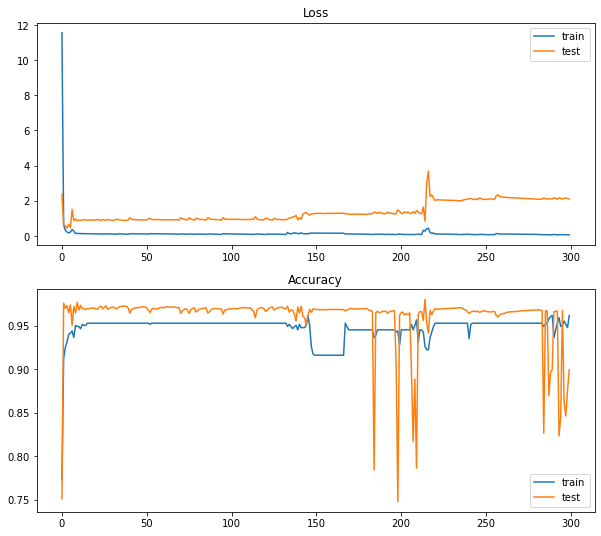

Train_accuracy: 0.961, Test_accuracy: 0.899


In [47]:
# plot loss during training
import matplotlib.pyplot as plt
plt.figure(figsize=(10,9))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
print('Train_accuracy: %.3f, Test_accuracy: %.3f' % (train_acc, test_acc))

A figure is created showing two line plots: one for the learning curves of the loss on the train and test sets and one for the classification on the train and test sets.

In [48]:
def get_model(trainX, trainy):
    # define model 
    model = Sequential()
    model.add(Dense(128, input_dim=29, activation='relu'))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=300, verbose=0)
    return model
model = get_model(trainX, trainy)
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

In [49]:
matrix1 = metrics.classification_report(testy, yhat_classes)
print("epochs:300 and lr:0.1")
print(matrix1)

epochs:300 and lr:0.1
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.80      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [50]:
#Changing the epochs and learning rate for expecting better accuracy score
#using epochs of 600 and decreasing lr to 0.1
def get_model(trainX, trainy):
   # define model
    model = Sequential()
    model.add(Dense(128, input_dim=29, activation='relu'))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=600, verbose=0)
    return model
model = get_model(trainX, trainy)
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

matrix2 = metrics.classification_report(testy, yhat_classes)
print("Epochs:600 and lr: 0.1")
print(matrix2)

Epochs:600 and lr: 0.1
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.74      0.06        98

    accuracy                           0.96     56962
   macro avg       0.52      0.85      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [51]:
#using epochs of 900 and decreasing lr to 0.1
def get_model(trainX, trainy):
    # define model
    model = Sequential()
    model.add(Dense(128, input_dim=29, activation='relu'))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(16, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=900, verbose=0)
    return model
model = get_model(trainX, trainy)
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

matrix3 = metrics.classification_report(testy, yhat_classes)
print("Epochs:900 and lr: 0.1")
print(matrix3)

Epochs:900 and lr: 0.1
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.87      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.91      0.52     56962
weighted avg       1.00      0.96      0.98     56962



we have played with different epochs and learning rate using adam optimizer. We henceforth get the result of epoch 300
and learning rate of 0.1 as the best accuracy_score with better f1_score,precision and recall

### We have used activation function of RELU and sigmoid as the best case.
**Sigmoid function:** The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

**RELU function:** The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.The ReLU is half rectified (from bottom), f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.

### Using SGD and RMS PROP optimizers:
#### 1.SGD

In [74]:
def get_model(trainX, trainy):
   # define model
    model = Sequential()
    model.add(Dense(128, input_dim=29, activation='relu'))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9,decay=0.09), metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=300, verbose=0)
    return model
model = get_model(trainX, trainy)
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

matrix = metrics.classification_report(testy, yhat_classes)
print("Epochs:300 and lr: 0.01")
print(matrix)

Epochs:300 and lr: 0.01
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.85      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.91      0.55     56962
weighted avg       1.00      0.98      0.99     56962



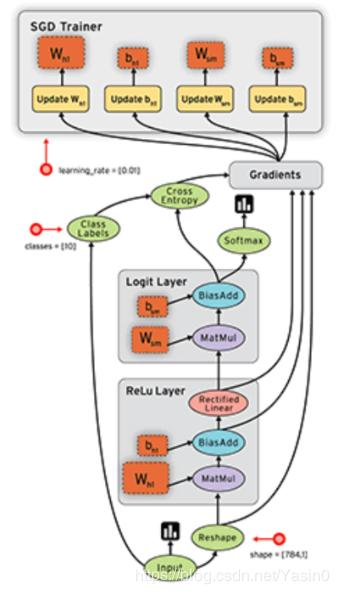

In [53]:
Image("dl_model_graph.png")

#### 2. RMS.prop

In [70]:
def get_model(trainX, trainy):
   # define model
    model = Sequential()
    model.add(Dense(128, input_dim=29, activation='relu'))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.9,decay=0.09), metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=300, verbose=0)
    return model
model = get_model(trainX, trainy)
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

matrix = metrics.classification_report(testy, yhat_classes)
print("Epochs:300 and lr: 0.01")
print(matrix)

Epochs:300 and lr: 0.01
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.83      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [71]:
# adding dropout of 0.4 to the previous RMSprop model:
def get_model(trainX, trainy):
   # define model
    model = Sequential()
    model.add(Dense(128, input_dim=29, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.9,decay=0.09), metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=300, verbose=0)
    return model
model = get_model(trainX, trainy)
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]

matrix = metrics.classification_report(testy, yhat_classes)
print("Epochs:300 and lr: 0.01")
print(matrix)


Epochs:300 and lr: 0.01
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.79      0.10        98

    accuracy                           0.98     56962
   macro avg       0.53      0.88      0.55     56962
weighted avg       1.00      0.98      0.99     56962



##### Using cross validation from sklearn model_selection to get best score:
To implement K-fold cross-validation, we use a scikit_learn wrapper in Keras: KerasClassifier. Specifically, we use Keras to build the model and use scikit_learn for cross-validation. First thing is to build a function for the model architecture as the function is a required argument for the Keras wrapper. As you notice below, this is the same ANN architecture as we built before.

With the classifier built using the above function, we create a KerasClassifier object. Below we specify the batch size of 10 and the number of epochs of 100 which model needs to be trained on.

Now, let’s apply K-fold cross-validation on the classifier by using cross_val_score() method. This function returns a list of training accuracy. Parameter cv is the fold number we use for cross-validation. Here the classifier will be trained on 10 different training sets, split from the initial training set.

In [56]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def get_model():
    model = Sequential()
    model.add(Dense(128, input_dim=29, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.9,decay=0.09), metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=get_model, epochs=100, batch_size=10)
results = cross_val_score(model, trainX, trainy, cv=10)


Epoch 1/100
709/709 [==============================] - 1s 904us/step - loss: 0.5002 - accuracy: 0.7687
Epoch 2/100
709/709 [==============================] - 0s 237us/step - loss: 0.3543 - accuracy: 0.8547
Epoch 3/100
709/709 [==============================] - 0s 237us/step - loss: 0.3639 - accuracy: 0.8477
Epoch 4/100
709/709 [==============================] - 0s 226us/step - loss: 0.3655 - accuracy: 0.8505
Epoch 5/100
709/709 [==============================] - 0s 226us/step - loss: 0.3926 - accuracy: 0.8392
Epoch 6/100
709/709 [==============================] - 0s 226us/step - loss: 0.3691 - accuracy: 0.8491
Epoch 7/100
709/709 [==============================] - 0s 237us/step - loss: 0.3700 - accuracy: 0.8138
Epoch 8/100
709/709 [==============================] - 0s 237us/step - loss: 0.3281 - accuracy: 0.8773
Epoch 9/100
709/709 [==============================] - 0s 237us/step - loss: 0.3215 - accuracy: 0.8787
Epoch 10/100
709/709 [==============================] - 0s 243us/step - l

709/709 [==============================] - 0s 237us/step - loss: 0.3084 - accuracy: 0.8942
Epoch 58/100
709/709 [==============================] - 0s 226us/step - loss: 0.3116 - accuracy: 0.8928
Epoch 59/100
709/709 [==============================] - 0s 226us/step - loss: 0.3107 - accuracy: 0.8773
Epoch 60/100
709/709 [==============================] - 0s 226us/step - loss: 0.3143 - accuracy: 0.8815
Epoch 61/100
709/709 [==============================] - 0s 229us/step - loss: 0.3032 - accuracy: 0.8801
Epoch 62/100
709/709 [==============================] - 0s 243us/step - loss: 0.3128 - accuracy: 0.8801
Epoch 63/100
709/709 [==============================] - 0s 248us/step - loss: 0.3051 - accuracy: 0.8829
Epoch 64/100
709/709 [==============================] - 0s 237us/step - loss: 0.3267 - accuracy: 0.8702
Epoch 65/100
709/709 [==============================] - 0s 226us/step - loss: 0.3311 - accuracy: 0.8717
Epoch 66/100
709/709 [==============================] - 0s 226us/step - loss:

709/709 [==============================] - 0s 237us/step - loss: 0.2816 - accuracy: 0.8886
Epoch 14/100
709/709 [==============================] - 0s 222us/step - loss: 0.3140 - accuracy: 0.8759
Epoch 15/100
709/709 [==============================] - 0s 233us/step - loss: 0.2953 - accuracy: 0.8815
Epoch 16/100
709/709 [==============================] - 0s 223us/step - loss: 0.2711 - accuracy: 0.8914
Epoch 17/100
709/709 [==============================] - 0s 226us/step - loss: 0.3257 - accuracy: 0.8815
Epoch 18/100
709/709 [==============================] - 0s 226us/step - loss: 0.3091 - accuracy: 0.8801
Epoch 19/100
709/709 [==============================] - 0s 226us/step - loss: 0.3256 - accuracy: 0.8731
Epoch 20/100
709/709 [==============================] - 0s 222us/step - loss: 0.3267 - accuracy: 0.8702
Epoch 21/100
709/709 [==============================] - 0s 226us/step - loss: 0.3217 - accuracy: 0.8759
Epoch 22/100
709/709 [==============================] - 0s 240us/step - loss:

709/709 [==============================] - 0s 237us/step - loss: 0.3663 - accuracy: 0.8477
Epoch 70/100
709/709 [==============================] - 0s 226us/step - loss: 0.3840 - accuracy: 0.8731
Epoch 71/100
709/709 [==============================] - 0s 223us/step - loss: 0.2973 - accuracy: 0.8942
Epoch 72/100
709/709 [==============================] - 0s 214us/step - loss: 0.3206 - accuracy: 0.8745
Epoch 73/100
709/709 [==============================] - 0s 221us/step - loss: 0.3609 - accuracy: 0.8773
Epoch 74/100
709/709 [==============================] - 0s 226us/step - loss: 0.3558 - accuracy: 0.8660
Epoch 75/100
709/709 [==============================] - 0s 305us/step - loss: 0.3813 - accuracy: 0.8449
Epoch 76/100
709/709 [==============================] - 0s 289us/step - loss: 0.3545 - accuracy: 0.8674
Epoch 77/100
709/709 [==============================] - 0s 293us/step - loss: 0.3910 - accuracy: 0.8632
Epoch 78/100
709/709 [==============================] - 0s 305us/step - loss:

709/709 [==============================] - 0s 237us/step - loss: 0.3118 - accuracy: 0.8843
Epoch 26/100
709/709 [==============================] - 0s 222us/step - loss: 0.2999 - accuracy: 0.8984
Epoch 27/100
709/709 [==============================] - 0s 226us/step - loss: 0.4093 - accuracy: 0.8378
Epoch 28/100
709/709 [==============================] - 0s 237us/step - loss: 0.3535 - accuracy: 0.8590
Epoch 29/100
709/709 [==============================] - 0s 226us/step - loss: 0.3119 - accuracy: 0.8829
Epoch 30/100
709/709 [==============================] - 0s 214us/step - loss: 0.3077 - accuracy: 0.8900
Epoch 31/100
709/709 [==============================] - 0s 214us/step - loss: 0.3353 - accuracy: 0.8900
Epoch 32/100
709/709 [==============================] - 0s 226us/step - loss: 0.3488 - accuracy: 0.8702
Epoch 33/100
709/709 [==============================] - 0s 226us/step - loss: 0.3425 - accuracy: 0.8872
Epoch 34/100
709/709 [==============================] - 0s 237us/step - loss:

Epoch 82/100
709/709 [==============================] - 0s 271us/step - loss: 0.3843 - accuracy: 0.8251
Epoch 83/100
709/709 [==============================] - 0s 350us/step - loss: 0.3832 - accuracy: 0.8646
Epoch 84/100
709/709 [==============================] - 0s 339us/step - loss: 0.3930 - accuracy: 0.8547
Epoch 85/100
709/709 [==============================] - 0s 327us/step - loss: 0.3989 - accuracy: 0.8646
Epoch 86/100
709/709 [==============================] - 0s 248us/step - loss: 0.3796 - accuracy: 0.8731
Epoch 87/100
709/709 [==============================] - 0s 226us/step - loss: 0.3737 - accuracy: 0.8731
Epoch 88/100
709/709 [==============================] - 0s 226us/step - loss: 0.3998 - accuracy: 0.8392
Epoch 89/100
709/709 [==============================] - 0s 226us/step - loss: 0.3566 - accuracy: 0.8759
Epoch 90/100
709/709 [==============================] - 0s 271us/step - loss: 0.3670 - accuracy: 0.8843
Epoch 91/100
709/709 [==============================] - 0s 339us

Epoch 60/100
710/710 [==============================] - 0s 259us/step - loss: 0.3578 - accuracy: 0.8831
Epoch 61/100
710/710 [==============================] - 0s 225us/step - loss: 0.3361 - accuracy: 0.8789
Epoch 62/100
710/710 [==============================] - 0s 225us/step - loss: 0.3350 - accuracy: 0.8986
Epoch 63/100
710/710 [==============================] - 0s 237us/step - loss: 0.3375 - accuracy: 0.8944
Epoch 64/100
710/710 [==============================] - 0s 225us/step - loss: 0.3626 - accuracy: 0.8746
Epoch 65/100
710/710 [==============================] - 0s 225us/step - loss: 0.3583 - accuracy: 0.8958
Epoch 66/100
710/710 [==============================] - 0s 226us/step - loss: 0.3424 - accuracy: 0.8958
Epoch 67/100
710/710 [==============================] - 0s 237us/step - loss: 0.3067 - accuracy: 0.9014
Epoch 68/100
710/710 [==============================] - 0s 225us/step - loss: 0.3302 - accuracy: 0.9085
Epoch 69/100
710/710 [==============================] - 0s 225us

Epoch 38/100
710/710 [==============================] - 0s 237us/step - loss: 0.3416 - accuracy: 0.8873
Epoch 39/100
710/710 [==============================] - 0s 225us/step - loss: 0.3816 - accuracy: 0.8690
Epoch 40/100
710/710 [==============================] - 0s 225us/step - loss: 0.4196 - accuracy: 0.8592
Epoch 41/100
710/710 [==============================] - 0s 225us/step - loss: 0.3338 - accuracy: 0.8845
Epoch 42/100
710/710 [==============================] - 0s 240us/step - loss: 0.3100 - accuracy: 0.8930
Epoch 43/100
710/710 [==============================] - 0s 237us/step - loss: 0.3145 - accuracy: 0.8915
Epoch 44/100
710/710 [==============================] - 0s 225us/step - loss: 0.3104 - accuracy: 0.8986
Epoch 45/100
710/710 [==============================] - 0s 230us/step - loss: 0.3539 - accuracy: 0.8930
Epoch 46/100
710/710 [==============================] - 0s 237us/step - loss: 0.3077 - accuracy: 0.9014
Epoch 47/100
710/710 [==============================] - 0s 225us

In [57]:
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Result: 86.00% (11.51%)


#### Here the cross-validation may take some time. But we finally got average accuracy of 86.00% and std deviation of 11.51%
### Anomaly Detection

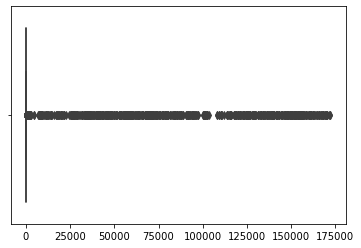

In [58]:
import seaborn as sns
sns.boxplot(x=df_under)

In [59]:
q1=df_under.quantile(0.25)
q2=df_under.quantile(0.5)
q3=df_under.quantile(0.75)
iqr=q3-q1
df_out = df_under[~((df_under < (q1 - 1.5 * iqr)) |(df_under > (q3 + 1.5 * iqr))).any(axis=1)]
print("Shape of df before otlier removal:",df_under.shape)
print("Shape of df after oulier removal:",df_out.shape)

Shape of df before otlier removal: (788, 31)
Shape of df after oulier removal: (431, 31)


We will use this df_out for further model evaluation

## Project Task: Week 4

#### Inference and Observations:

1. Visualize the scores for Fraudulent and Non-Fraudulent transactions.
2. Find out the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.
3. Can this score be used as an engineered feature in the models developed previously? Are there any incremental gains in F1-Score? Why or Why not?
4. Be as creative as possible in finding other interesting insights.





#### Visualizing the fraudalent and non-fradaulant transcation after anomaly or outlier removal from undersampled data.

0    294
1    137
Name: Class, dtype: int64


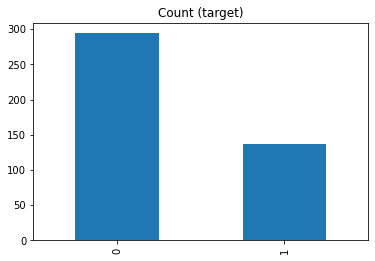

In [60]:
df_out.Class.value_counts().plot(kind='bar', title='Count (target)');
print(df_out.Class.value_counts())

##### Defining the threshold value for marking or reporting a transaction as fraudulent in your anomaly detection system.

In [61]:
def outlier_rem(x):
    q1=x.quantile(0.25)
    q2=x.quantile(0.5)
    q3=x.quantile(0.75)
    iqr=q3-q1
    lower_th=q1-(1.5*iqr)
    upper_th=q2+(1.5*iqr)
    x1=x[((x>=lower_th)&(x<=upper_th)).any(axis=1)]
    print("lower threshold:","\n",lower_th)
    print("upper threshold:","\n",upper_th)
    return(x1)
x1=outlier_rem(df_under)


lower threshold: 
 Time     -83988.125000
V1           -8.683202
V2           -4.626549
V3          -13.531485
V4           -6.568917
V5           -5.251152
V6           -3.965961
V7           -8.120170
V8           -1.856396
V9           -5.896144
V10         -11.908802
V11          -5.736022
V12         -14.003170
V13          -3.135992
V14         -17.108448
V15          -2.609745
V16          -9.315842
V17         -13.784541
V18          -5.191057
V19          -2.604161
V20          -1.238133
V21          -1.443858
V22          -2.203298
V23          -0.858828
V24          -1.577880
V25          -1.410647
V26          -1.209209
V27          -0.836024
V28          -0.515055
Amount     -146.185000
Class        -1.500000
dtype: float64
upper threshold: 
 Time      208547.375000
V1             4.919039
V2             5.533132
V3             6.918661
V4             7.918982
V5             3.026262
V6             1.816794
V7             4.360187
V8             1.856849
V9             2.9

##### Can this score be used as an engineered feature in the models developed previously?
We have used the df_out dataset in the previously used models and the accuracy or f1_scores can be showned below:

In [62]:
X_out=df_out.loc[:,df_out.columns!='Class']
y_out=df_out.loc[:,df_out.columns == 'Class']
X_tr,X_te,y_tr,y_te=train_test_split(X_out,y_out,test_size=0.2)
Y_test=validation_df['Class']

In [63]:
## i)Naive Bayes model:
gnb = GaussianNB() 
gnb_fit=gnb.fit(X_tr, y_tr.values.ravel()) 
y_pred_nb = gnb_fit.predict(test_df)

NB_ACC=metrics.accuracy_score(Y_test,y_pred_nb)
NB_F1=metrics.f1_score(Y_test,y_pred_nb)

## ii)Logistic Regression model:
lrb= LogisticRegression(max_iter=1000)
lrb_fit=lrb.fit(X_tr,y_tr.values.ravel())
y_pred_lr=lrb_fit.predict(test_df)

LR_ACC=metrics.accuracy_score(Y_test,y_pred_lr)
LR_F1=metrics.f1_score(Y_test,y_pred_lr)

## iii)XGBoost Classifier:
xgb_model_out = xgboost.XGBClassifier(objective='binary:logistic',
                 colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
xgb_model_out.fit(X_tr,y_tr.values.ravel())
xgb_pred_out=xgb_model_out.predict(test_df)
XGB_ACC=metrics.accuracy_score(Y_test,xgb_pred_out)
XGB_F1=metrics.f1_score(Y_test,xgb_pred_out)

In [64]:
## iv)ANN with RMSprop optimizer and also using dropout:

x = df_out.loc[:,df_out.columns.tolist()[1:30]]
x = x.values
y = df_out.loc[:,'Class']
y = y.values
trainX=x
trainy=y
testX=test_df.loc[:,df_out.columns.tolist()[1:30]]
testy=Y_test

def get_model(trainX, trainy):
   # define model
    model = Sequential()
    model.add(Dense(128, input_dim=29, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01,momentum=0.9,decay=0.09), metrics=['accuracy'])
    # fit model
    model.fit(trainX, trainy, epochs=900, verbose=0)
    return model
model = get_model(trainX, trainy)
yhat_probs = model.predict(testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
ANN_ACC=metrics.accuracy_score(testy, yhat_classes)
ANN_F1=metrics.f1_score(testy, yhat_classes)

In [65]:
print("Accuracy and F1 score of NB:",NB_ACC,NB_F1)
print("Accuracy and F1 score of LR:",LR_ACC,LR_F1)
print("Accuracy and F1 score of XGB:",XGB_ACC,XGB_F1)
print("Accuracy and F1 score of ANN:",ANN_ACC,ANN_F1)

Accuracy and F1 score of NB: 0.9541975351989045 0.05914172376487559
Accuracy and F1 score of LR: 0.9631684280748569 0.07577092511013217
Accuracy and F1 score of XGB: 0.9827779923457743 0.1476976542137272
Accuracy and F1 score of ANN: 0.980618658052737 0.12933753943217666


### Comparing the model scores (accuracy & f1_score) for week 3 & week4:

## Models used in Week 3 after undersampling 
|Model used in week3 | Accuracy | F1_score|
| :--- | :--- |:---|
|1. Gaussian Naive Bayes|0.98|0.10|
|2. Logistic regression|0.97|0.09|
|3. Random Forest Classifier|0.99|0.31|
|4. XGBoost Classifier|0.97|0.10|
|5. Artificial Neural Network|
|i) epochs 300 & lr=0.1|0.98|0.14|
|ii)epochs 600 & lr=0.1|0.96|0.07|
|iii) epochs 900 & lr=0.1|0.96|0.06|
|iv)Stochastic gradient descent(SGD opt)|0.98|0.11|
|v) RMSprop opt|0.98|0.11|
|vi)RMSprop opt with dropout|0.98|0.10|


## Models used in Week 4 after outlier removal 

|Model used in week4 | Accuracy | F1_score|
| :--- | :--- |:---|
|1. Gaussian Naive Bayes|0.95|0.05|
|2. Logistic regression|0.96|0.07|
|3. XGBoost Classifier|0.98|0.14|
|4. Artificial Neural Network with RMSprop opt and dropout|0.98|0.12|

We have got incremental gains in f1 score for Logistic regression, XGBoost and ANNs.

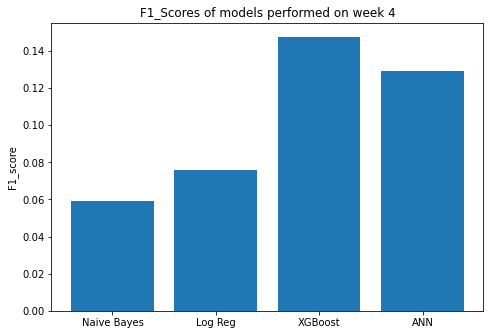

In [75]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
score = ['Naive Bayes', 'Log Reg','XGBoost','ANN']
acc=[NB_F1,LR_F1,XGB_F1,ANN_F1]
ax.bar(score,acc)
ax.set_ylabel('F1_score')
ax.set_title('F1_Scores of models performed on week 4')
plt.show()

## After plotting the f1-scores of all the models after outlier removal we can conclude that the ANN & XGBoost classifier gives much better result than all other models.

## Hence accepting XGBoost as the best model in the overall analysis of the project.

<br/>
<center><h3>&lt;END/&gt;</h3></center>
<br/>